# Python Data Science Bite-Sized Lesson:<br>Introduction to Pandas and Matplotlib

**Author**: Michelle Franc Ragsac (mragsac@eng.ucsd.edu)

---

**Notebook Information:**

This Jupyter Notebook contains information on the basic functionality of the `pandas` and `matplotlib` packages in Python for Module 4: Introduction to HPC. <br>It's running with a `Python 3` kernel! 

---

## Import Necessary Packages for the Module

Before we start coding, we want to import the `modules` that we'll be using in our notebook. This is the same as importing the modules at the beginning of a Python script. 

For the three packages we'll be going through for this series of notebooks, they have different conventions for how they're called in people's code. The shorthand for `numpy` is `np`, `pandas` is `pd`, and `matplotlib.pyplot` is `plt`. If you find any code online (e.g., through StackOverflow) and you see these terms, these are the packages they're usually referring to! 

In [1]:
import numpy as np                 # adds support for large, multi-dimensional arrays and optimized linear alg 
import pandas as pd                # adds support for Excel-like table operations (i.e. R Data Frames)
import matplotlib.pyplot as plt    # adds support for plotting in Python

In addition to importing these packages, there is a special line that we can add to view any plots generated with `matplotlib` within our notebook as part of the output of a code cell! 

This special line is called a "magic function"! 

**Documentation on Magic Functions in Jupyter Notebooks**: https://ipython.readthedocs.io/en/stable/interactive/magics.html

In [2]:
%matplotlib inline

---

## Introduction to Pandas

Pandas is an open-source data analysis package in Python that aids in data analysis and manipulation using `DataFrame` and `Series` objects. These `DataFrame` objects can be thought of as multidimensional arrays with attached row and column tables, similar to the tables found in Excel Spreadsheets or `data.frame` objects in the R Programming Language. The `Series` objects can be thought of as a single column with connected row and column labels. Pandas also has tools for reading and writing data between in-memory structures and different commonly-used formats, such as CSV, text files, Microsoft Excel sheets, SQL databases, and the HDF5 format. 

**Pandas Website**: https://pandas.pydata.org/
<br>**Pandas Code Base on GitHub**: https://github.com/pandas-dev/pandas

<div class="alert alert-block alert-info">
    <b>Note:</b> This notebook contains a <strong>very brief</strong> introduction to the Pandas package in Python and is nowhere near comprehensive! I encourage you to look up other tutorials online if you want to delve in deeper and unlock Pandas' full potential for your analyses! 
</div>

**Pandas Community Tutorials**: https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

---

## Creating a Pandas `DataFrame` from Scratch

To start off, we'll learn how to create a `DataFrame` object from scratch. This is an important skill to learn as it helps you test new methods and functions you might find in the Pandas documentation. One of the easisest ways to create a `DataFrame` from scratch is to use a `dict` object. 

<div class="alert alert-block alert-info">
    <b>Note:</b> Dictionaries (<code>dict</code>) are a hash table sstructure that is built into Python. They're unordered collections of items where each item has an associated key-value pairing. Dictionaries are optimized to retrieve values when a key is provided. 
</div>

In [6]:
# Create a dictionary called data and populate each key with its values (key : value)
data = {
    'tacos': [1, 3, 2],
    'burritos': [1, 1, 2]
}

# Create a list called names containing what we want to label our indices in our dataframe
names = ['Michelle', 'Cameron', 'Owen']

# Pass the dictionary to the DataFrame constructor to create a dataframe called purchases
purchases = pd.DataFrame(data, index=names)
purchases # preview the dataframe in the notebook

,tacos,burritos
Michelle,1,1
Cameron,3,1
Owen,2,2


Now, we have a `DataFrame` object called `puchases` containing a table of how many `burritos` and `tacos` each person purchased! 

## Selecting Rows in a `DataFrame` Based on its Index Value

Say we wanted to know how many `tacos` and `burritos` Cameron purchased. We can select rows within the `DataFrame` object using the `loc()` method:

In [7]:
purchases.loc['Cameron']

tacos       3
burritos    1
Name: Cameron, dtype: int64

From this command, we can see that Cameron purchased three `tacos` and one `burrito`! 

## Selecting Columns in a `DataFrame` Based on its Column Value

Alternatively, say we wanted to know how many `tacos` were purchased amongst all of our customers. We can select columns within the `DataFrame` object with the following syntax: 

```python
df[COLUMN_NAME]
```

Where `df` represents the name of the `DataFrame` we would like to interact with, and `COLUMN_NAME` represents the column that we want to index. 

Within our example, let's see how many tacos were purchased amongst all of our customers:

In [9]:
purchases['tacos']

Michelle    1
Cameron     3
Owen        2
Name: tacos, dtype: int64

This output shows us that Michelle purchased a single taco, Cameron purchased three tacos, and Owen purchased two tacos! 

Notice that the output also gives us the name of the column that we selected (`tacos`), as well as the type of the values within the column (`int64`).

---

## The First Steps: Reading in Data into a `DataFrame` Object

Sometimes, the data that you want to look at with Pandas is stored as a CSV file, or a Microsoft Excel document, or even a SQL database! Regardless of the data storage format, to manipulate data with Pandas `DataFrame`s, the first step is to import the data into a data structure that is compatible with Pandas. 

Within this notebook, we'll be importing a CSV file containing nutritional data on 80 different breakfast cereals using the `read_csv()` method! This dataset was uploaded to the Kaggle website by user Chris Crawford, and the data was gathered and cleaned by Petra Isenberg, Pierre Dragicevic, and Yvonne Jansen. We'll be using this dataset as we learn about some of Pandas' basic functionality.

<div class="alert alert-block alert-info">
    <b>Note:</b> Kaggle (<a href="https://www.kaggle.com/">https://www.kaggle.com/</a>) is a large data science and machine learning community! It allows users to find and publish data sets, explore and build models in a web-based data science environment, and work with other data scientists and machine learning engineers. It's most well known for its online data science competitions where users can solve data science challenges that are provided by individuals or large companies.
</div>

**Input/Output Pandas Documentation**: https://pandas.pydata.org/pandas-docs/stable/reference/io.html

**80 Cereals Kaggle Page**: https://www.kaggle.com/crawford/80-cereals/home
<br>**80 Cereals Project Website**: https://perso.telecom-paristech.fr/eagan/class/igr204/datasets

In [10]:
# First, we'll use the read_csv() method to read int the cereals dataset into a dataframe called df 
path_to_file = 'data/cereal.csv'
df = pd.read_csv(path_to_file)

### Previewing the Data with the `head()` and `tail()` Methods

After reading in our data, one of the first things I like to do is to preview the raw data within the `DataFrame`. 

Personally, I like to do this to make sure that I read in the data properly and everything looks like how I would expect it to import (e.g., everything isn't all in one column, etc.). 

In [11]:
# Next, we'll preview the first few rows of the data frame using the method head()
df.head()

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
0,100% Bran,Nabisco,Cold,70,4,1,130,10.0,5.0,6,280,25,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,Cold,120,3,5,15,2.0,8.0,8,135,0,1.0,1.00,33.983679
2,All-Bran,Kelloggs,Cold,70,4,1,260,9.0,7.0,5,320,25,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,Cold,50,4,0,140,14.0,8.0,0,330,25,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,Cold,110,2,2,200,1.0,14.0,8,-1,25,1.0,0.75,34.384843


As we can see from this preview from the `head()` method, this dataset contains several fields. I retrieved the field information from the Kaggle page for this dataset: 

| Field Name     | Description                          | Field Name | Description                                | Field Name | Description                                             |
|----------------|--------------------------------------|------------|--------------------------------------------|------------|---------------------------------------------------------|
| `name`         | Name of the cereal                   | `fat`      | Grams of fat per serving                   | `vitamins` | typical percentage of FDA-recommended vitamins/minerals |
| `manufacturer` | Manufacturer of the cereal           | `sodium`   | Milligrams of sodium per serving           | `shelf`    | display shelf (`1`, `2`,  or `3` from the floor)        |
| `type`         | Type of the cereal (`Cold` or `Hot`) | `fiber`    | Grams of dietary fiber per serving         | `weight`   | weight in ounces of one serving                         |
| `calories`     | Calories per serving                 | `carbo`    | Grams of complex carbohydrates per serving | `cups`     | number of cups in one serving                           |
| `protein`      | Grams of protein per serving         | `sugars`   | Grams of sugars per serving                | `rating`   | rating of the cereals                                   |

Alternatively, we can also use the `tail()` method to preview the **end** of the `DataFrame` (versus the **beginning** of the `DataFrame`).

In [12]:
# Preview the last few rows of the dataframe using the method tail()
df.tail()

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
72,Triples,General Mills,Cold,110,2,1,250,0.0,21.0,3,60,25,1.0,0.75,39.106174
73,Trix,General Mills,Cold,110,1,1,140,0.0,13.0,12,25,25,1.0,1.00,27.753301
74,Wheat Chex,Ralston Purina,Cold,100,3,1,230,3.0,17.0,3,115,25,1.0,0.67,49.787445
75,Wheaties,General Mills,Cold,100,3,1,200,3.0,17.0,3,110,25,1.0,1.00,51.592193
76,Wheaties Honey Gold,General Mills,Cold,110,2,1,200,1.0,16.0,8,60,25,1.0,0.75,36.187559


<div class="alert alert-block alert-info">
    <b>Note:</b> For the <code>head()</code> and <code>tail()</code> methods, you can input the number of lines you would like to preview from the beginning or end of the <code>DataFrame</code>, respectively. As an example, the <code>df.head(17)</code> command would preview the first seventeen lines of the <code>DataFrame</code> called <code>df</code>; likewise, the command <code>df.tail(23)</code> would view the last twenty-three lines. 
</div>

### Viewing the Shape of a `DataFrame` with the `shape` Attribute

After reading in a dataset and making sure that everything was properly imported with the `head()` and/or `tail()` commands, I like to view the dimensions of the dataset using the `shape` attribute! 

In [14]:
# Show the shape of the dataframe using shape 
df.shape

(77, 15)

From this result, we can see that there are `77` rows and `15` columns within the 80 Cereals dataset! Or, I guess we should say 77 cereals? 

### Getting Info About the `DataFrame` with the `info()` Method 

Another method that I like to run when I first open a `DataFrame` is the `info()` method in order to get a quick summary about all of the entries within the `DataFrame`, along with their recognized data types. In particular, this method provides the number of rows and columns, the number of non-null values, what type of data is in each column, and how much memory the `DataFrame` uses. 

In [13]:
# Let's try running the info method on the 80 cereals dataset! 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          77 non-null     object 
 1   manufacturer  77 non-null     object 
 2   type          77 non-null     object 
 3   calories      77 non-null     int64  
 4   protein       77 non-null     int64  
 5   fat           77 non-null     int64  
 6   sodium        77 non-null     int64  
 7   fiber         77 non-null     float64
 8   carbo         77 non-null     float64
 9   sugars        77 non-null     int64  
 10  potass        77 non-null     int64  
 11  vitamins      77 non-null     int64  
 12  weight        77 non-null     float64
 13  cups          77 non-null     float64
 14  rating        77 non-null     float64
dtypes: float64(5), int64(7), object(3)
memory usage: 9.1+ KB


After running the `info()` method on our dataset, we can see that we don't have any null values within the data frame! 

---

## Slicing, Selecting, and Extracting Data from `DataFrame` Objects

Sometimes, you have a `DataFrame`, but it contains more information than you need. A useful thing to know is how to select the exact columns or rows that you'll need to use constantly in an anslysis, instead of just the simple row and column indexing we did at the very beginning of this notebook. You can "slice", or take subsections segments of a `DataFrame`, according to specific columns or rows of interest, or even cells that meet certain attributes! 

### Selecting Multiple Columns of a `DataFrame` Object

Previously, we learned how to select a particular column within a `DataFrame`. 

However, there is a way to select multiple columns simultaneously! You can extract specific columns as a `DataFrame` object (or even a single column) by passing a list of column names to the selector. 

In [15]:
# Select the name, manufacturer, and type columns within the dataframe
df_col_select = df[['name', 'manufacturer', 'type']]
df_col_select.head()

,name,manufacturer,type
0,100% Bran,Nabisco,Cold
1,100% Natural Bran,Quaker Oats,Cold
2,All-Bran,Kelloggs,Cold
3,All-Bran with Extra Fiber,Kelloggs,Cold
4,Almond Delight,Ralston Purina,Cold


### Conditional Selection for Multiple Rows of a `DataFrame` Object with the `loc()` Method 

Previously, we learned how to select a particular row within a `DataFrame` with the `loc()` method. 

However, we can expand upon selecting a single row using conditional selections. We can first take a column from the `DataFrame` and then apply a `boolean` condition to it; this will select all of the rows within the `DataFrame` that meet our `boolean` condition in the column that we've selected! 

In [16]:
# Gather all of the rows, or cereals, in the dataframe that are manufactured by general mills 
df_loc_select = df.loc[df['manufacturer'] == 'General Mills']
df_loc_select

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
5,Apple Cinnamon Cheerios,General Mills,Cold,110,2,2,180,1.5,10.5,10,70,25,1.00,0.75,29.509541
7,Basic 4,General Mills,Cold,130,3,2,210,2.0,18.0,8,100,25,1.33,0.75,37.038562
11,Cheerios,General Mills,Cold,110,6,2,290,2.0,17.0,1,105,25,1.00,1.25,50.764999
12,Cinnamon Toast Crunch,General Mills,Cold,120,1,3,210,0.0,13.0,9,45,25,1.00,0.75,19.823573
13,Clusters,General Mills,Cold,110,3,2,140,2.0,13.0,7,105,25,1.00,0.50,40.400208
14,Cocoa Puffs,General Mills,Cold,110,1,1,180,0.0,12.0,13,55,25,1.00,1.00,22.736446
18,Count Chocula,General Mills,Cold,110,1,1,180,0.0,12.0,13,65,25,1.00,1.00,22.396513
22,Crispy Wheat & Raisins,General Mills,Cold,100,2,1,140,2.0,11.0,10,120,25,1.00,0.75,36.176196
31,Golden Grahams,General Mills,Cold,110,1,1,280,0.0,15.0,9,45,25,1.00,0.75,23.804043
36,Honey Nut Cheerios,General Mills,Cold,110,3,1,250,1.5,11.5,10,90,25,1.00,0.75,31.072217


From this command, we selected all rows within the `DataFrame` object `df` that had a `manufacturer` equal to `General Mills`.

<div class="alert alert-block alert-info">
    <b>Note:</b> You can chain multiple <code>boolean</code> conditions within the <code>loc()</code> method by enclosing each condition within parentheses (the <code>(</code> and <code>)</code> characters) then connecting them with either an <code>AND</code> condition (indicated by a <code>&</code> symbol) or an <code>OR</code> condition (indicated by a <code>|</code> symbol). 
</div>

In [18]:
# Gather all of the rows, or cereals, in the dataframe that are manufactured by general mills 
# AND the number of calories per serving is greater than 110
df_loc_select2 = df.loc[(df['manufacturer'] == 'General Mills') & (df['calories'] > 110)]
df_loc_select2

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
7,Basic 4,General Mills,Cold,130,3,2,210,2.0,18.0,8,100,25,1.33,0.75,37.038562
12,Cinnamon Toast Crunch,General Mills,Cold,120,1,3,210,0.0,13.0,9,45,25,1.00,0.75,19.823573
51,Oatmeal Raisin Crisp,General Mills,Cold,130,3,2,170,1.5,13.5,10,120,25,1.25,0.50,30.450843
70,Total Raisin Bran,General Mills,Cold,140,3,1,190,4.0,15.0,14,230,100,1.50,1.00,28.592785


---

## Final Notes on Pandas

Knowing how to explore, clean, transform, and visualize data within Pandas is an essential skill in data science and bioinformatics! Even knowing how to clean data so it can be properly presented as a Pandas `DataFrame` takes up, like, 70% of your time programming! Because this notebook was *extremely* brief in covering what Pandas is capable of, I encourage you to look up more tutorials online and work with Pandas through a few projects to become more comfortable with the basics! 

---

## Bite-Sized Introduction to Matplotlib 

Matplotlib is a popular data visualization library in Python that allows you to create figures and plots, as well as provides methods for exporting these plots as static raster or vector files! There's also some support for interactive visualizations! All of the plotting functions contained with `matplotlib.pyplot` are similar to ways you would plot data points within `MATLAB`. 

<div class="alert alert-block alert-info">
    <b>Note:</b> Within this notebook, we'll be using Matplotlib to create a basic plot of some of the data points within the 80 cereals dataset we used previously! However, this introduction is extremely bite-sized and only shows a single example of what Matplotlib has to offer. I encourage you to look up tutorials online, or explore the Matplotlib Gallery to see other examples of plots: <a href="https://matplotlib.org/gallery/index.html">https://matplotlib.org/gallery/index.html</a>.
</div>

**Matplotlib Website**: https://matplotlib.org/index.html
<br>**Matplotlib Code Base on GitHub**: https://github.com/matplotlib/matplotlib

---

## Creating a Simple Figure with the Matplotlib `plot()` Method

One of the simplest methods in Matplotlib is the `plot()` method. This method simply plots an input of values, `y`, versus another input of values, `x`, as lines and/or markers. 

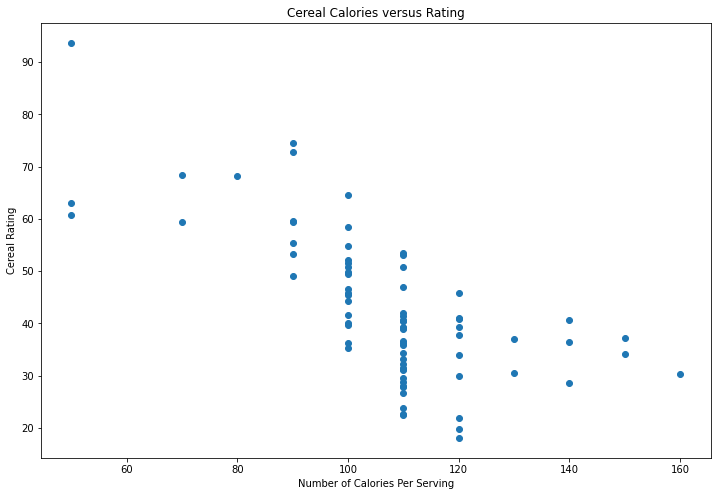

In [24]:
rating = df['rating'] # select the rating column
calories = df['calories'] # select the calories column

# Now, let's try plotting the rating of a cereal versus its number of calories using matplotlib! 

plt.figure(figsize=(12,8));                    # denotes the the size we want the figure to be
plt.plot(calories,rating,'o');                 # provides x = calories, y = rating, and we want our points to be circles
plt.title('Cereal Calories versus Rating');    # adds the title to the plot
plt.xlabel('Number of Calories Per Serving');  # adds the x-axis label to the plot
plt.ylabel('Cereal Rating');                   # adds the y-axis label to the plot

<div class="alert alert-block alert-info">
    <b>Note:</b> There are two styles to generating figures with Matplotlib! One is an "object-oriented (OO) style" and the other is a "pyplot style". The OO-style explicitly creates figures and axes before calling methods on them to plot one's data, whereas the pyplot-style relies on <code>matplotlib.pyplot</code> to automatically create and manage the figure and axes before using the pyplot functions for plotting. <strong>Within the example above, I take advantage of the pyplot-style.</strong>
</div>

### Anatomy of a Matplotlib Figure

There are several components of a Matplotlib figure that you can control when generating your plots. There are a few main components to consider:

1. `Figure` objects keep track of all of the child `Axes`, `Artist` objects (e.g., titles, figure legends, etc.), and the `Canvas` object. 
2. `Axes` are the region of the plot that control the data limits and are the region of the image containing the data points. 
3. `Axis` objects are the number-line-like features that set the graph limits, tick marks, and tick labels. 
4. `Artist` objects are everything you can see on the figure, including the `Figure`, `Axes`, and `Axis` objects, and also include any other objects that are drawn onto the `Canvas` itself. 

![](https://matplotlib.org/_images/anatomy.png)

*Image and Information Reference:* https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

---

## Final Notes on Matplotlib

Matplotlib is a commonly-used tool for generating plots within Python that provides users with the ability to completely customize their data visualizations! Even though we only showed one plot here, there are many more that are possible for you to create. I encourage you to look up tutorials online to explore the full power of Matplotlib in generating plots, as well as the Python Graph Gallery (https://python-graph-gallery.com/) to see what types of plots are possible using the Python programming language. 

### Alternatives to Matplotlib 

The Matplotlib syntax can be quite daunting, and the plots that it creates aren't the most aesthetic! There are other packages that build off of the Matplotlib framework to provide methods for plotting that are easier to use as well as more pleasing to the eye. Some of these examples include:

* `Seaborn` builds on top of Matplotlib to provide a neat interface to create a wide range of useful plot types: https://seaborn.pydata.org/
* `Plotly` is a plotting ecosystem that includes a Python plotting library, and is most well-known for interactive plots: https://plotly.com/python/
* `Bokeh` is another package that specializes in interactive plots that are intended for web applications: https://docs.bokeh.org/en/latest/index.html
* `Altair` is based on a declarative plotting language called Vega that scales well for complex plots: https://altair-viz.github.io/
* `Pandas` also has a convenient plotting API that acts as a wrapper around Matplotlib to directly plot information from `DataFrames`: https://pandas.pydata.org/docs/user_guide/visualization.html